In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB

df = pd.read_csv('Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [2]:
linhas, colunas = df.shape
print(f'Linhas: {linhas}')
print(f'Colunas: {colunas}')

Linhas: 800
Colunas: 13


In [3]:
# renomeando colunas
df.columns = ['Id',  'Nome', 'Tipo 1', 'Tipo 2', 'Total', 'HP', 'Ataque', 'Defesa', 'Sp.At', 'Sp.Def', 'Velocidade', 'Geração', 'Lendário']
df.head()

,Id,Nome,Tipo 1,Tipo 2,Total,HP,Ataque,Defesa,Sp.At,Sp.Def,Velocidade,Geração,Lendário
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
# Verificar se há valores ausentes e tratar, se necessário
df.isnull().sum()
df = df.dropna()
# numero de linhas e colunas
df.shape

(414, 13)

In [5]:
# Verificar se há valores NaN
print(df.isnull().any())

Id            False
Nome          False
Tipo 1        False
Tipo 2        False
Total         False
HP            False
Ataque        False
Defesa        False
Sp.At         False
Sp.Def        False
Velocidade    False
Geração       False
Lendário      False
dtype: bool


In [6]:
# tipos de dados
df.dtypes

Id             int64
Nome          object
Tipo 1        object
Tipo 2        object
Total          int64
HP             int64
Ataque         int64
Defesa         int64
Sp.At          int64
Sp.Def         int64
Velocidade     int64
Geração        int64
Lendário        bool
dtype: object

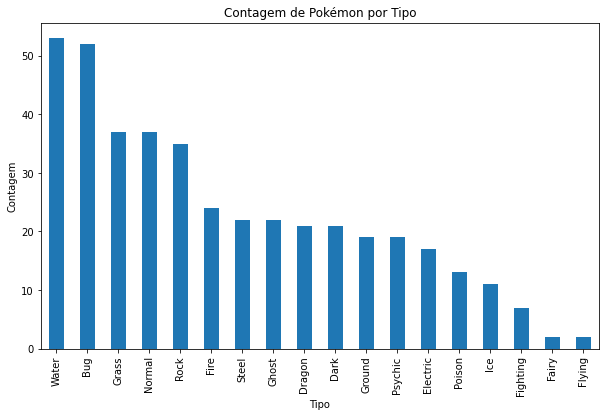

In [7]:
# Gráfico de barras com a contagem de Pokémon por tipo
plt.figure(figsize=(10, 6))
df['Tipo 1'].value_counts().plot(kind='bar')
plt.xlabel('Tipo')
plt.ylabel('Contagem')
plt.title('Contagem de Pokémon por Tipo')
plt.show()

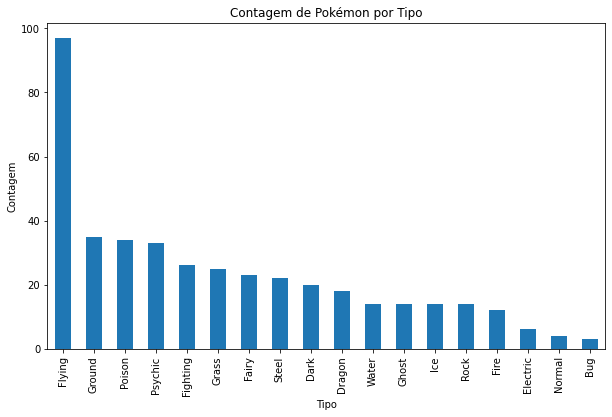

In [8]:
# Gráfico de barras com a contagem de Pokémon por tipo
plt.figure(figsize=(10, 6))
df['Tipo 2'].value_counts().plot(kind='bar')
plt.xlabel('Tipo')
plt.ylabel('Contagem')
plt.title('Contagem de Pokémon por Tipo')
plt.show()

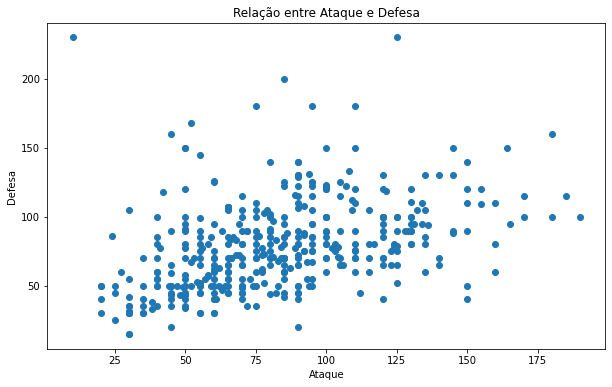

In [9]:
# Gráfico de dispersão mostrando a relação entre Ataque e Defesa
plt.figure(figsize=(10, 6))
plt.scatter(df['Ataque'], df['Defesa'])
plt.xlabel('Ataque')
plt.ylabel('Defesa')
plt.title('Relação entre Ataque e Defesa')
plt.show()

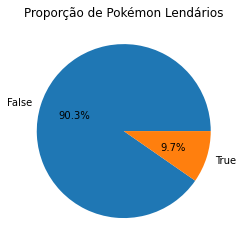

In [10]:
# Gráfico de pizza mostrando a proporção de Pokémon Lendários
df['Lendário'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Proporção de Pokémon Lendários')
plt.show()

In [11]:
# Criar a coluna "Vencedor" com base em algum critério
df['Vencedor'] = df.apply(lambda row: 'Pokemon1' if row['Ataque'] > row['Defesa'] else 'Pokemon2', axis=1)

In [12]:
# Selecionar as características relevantes para a batalha e o alvo (vencedor)
features = ['HP', 'Ataque', 'Defesa', 'Sp.At', 'Sp.Def', 'Velocidade']
target = 'Vencedor'

X = df[features]
y = df[target]

In [13]:
# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Treinar o modelo de Árvore de Decisão
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
# Realizar previsões com o modelo treinado
y_pred = model.predict(X_test)

In [16]:
# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy}")

Acurácia do modelo: 0.8795180722891566


In [17]:
# Exemplo de previsão para uma batalha de dois Pokémon específicos
pokemon1 = [80, 100, 120, 80, 70, 90]  # Valores das características do primeiro Pokémon
pokemon2 = [70, 90, 70, 100, 120, 80]  # Valores das características do segundo Pokémon


In [18]:
battle_data = [pokemon1, pokemon2]
predicted_winner = model.predict(battle_data)
print(f"O vencedor da batalha é: {predicted_winner}")

O vencedor da batalha é: ['Pokemon2' 'Pokemon1']


/home/diogo/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [19]:
# Selecionar as características relevantes para a regressão linear
X = df[['HP']]
y = df['Ataque']

In [20]:
# Instanciar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [21]:
# Realizar previsões com o modelo treinado
y_pred = model.predict(X)

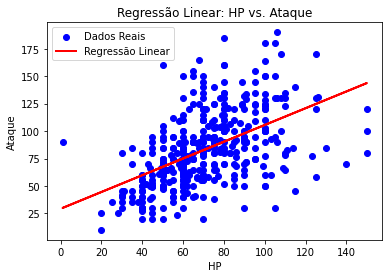

In [22]:
# Visualizar a regressão linear no gráfico
plt.scatter(X['HP'], y, color='blue', label='Dados Reais')
plt.plot(X['HP'], y_pred, color='red', linewidth=2, label='Regressão Linear')
plt.xlabel('HP')
plt.ylabel('Ataque')
plt.title('Regressão Linear: HP vs. Ataque')
plt.legend()
plt.show()

In [23]:
# Selecionar as características relevantes para a classificação
features = ['HP', 'Ataque', 'Defesa', 'Sp.At', 'Sp.Def', 'Velocidade']
X = df[features]
y = df['Lendário']

In [24]:
# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Instanciar e treinar o modelo Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [26]:
# Realizar previsões com o modelo treinado
y_pred = model.predict(X_test)

In [27]:
# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo: {:.2f}%".format(accuracy * 100))

Acurácia do modelo: 92.77%


In [28]:
# Dados do Pokémon de teste
pokemon_lendario = [100, 120, 100, 150, 120, 90]  # Características do Pokémon lendário: HP, Ataque, Defesa, Sp.At, Sp.Def, Velocidade
# Exemplo de Pokémon não lendário
pokemon_nao_lendario = [70, 80, 70, 65, 65, 90]

In [29]:
# Realizar previsão para o Pokémon de teste
previsao = model.predict([pokemon_lendario])
previsao2 = model.predict([pokemon_nao_lendario])


/home/diogo/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/home/diogo/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [30]:
print(previsao)
print(previsao2)

[ True]
[False]


In [31]:
# Exibir o resultado da previsão
if previsao[0] == 1:
    print("O Pokémon é lendário.")
else:
    print("O Pokémon não é lendário.")

O Pokémon é lendário.


In [32]:
# Exibir o resultado da previsão
if previsao2[0] == 1:
    print("O Pokémon é lendário.")
else:
    print("O Pokémon não é lendário.")

O Pokémon não é lendário.
